### 3. LEE（局部线性嵌入）　非线性降维

##### LEE是一种不依赖于投影的流形学习技术　　

工作原理是先测量每个训练实例如何与其最近的邻居线性相关，然后寻找训练集的低维表示　　

其中这些局部关系得到最好的保留　　

第一步：进行局部线性建模　　

第二步：在保持关系的同时减少维度　　



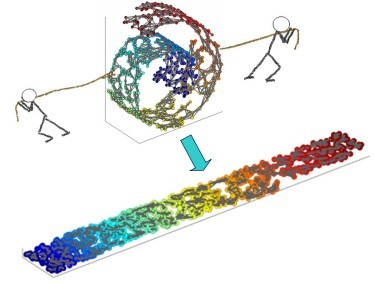

In [1]:

# 导入核心库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.datasets import make_s_curve, make_swiss_roll, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# 绘图样式设置（解决中文/负号显示问题）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 100  # 图片清晰度

In [ ]:
# 生成3维S型曲线数据（n_samples=1500，加入少量噪声）
np.random.seed(42)  # 固定随机种子，结果可复现
X, y = make_s_curve(n_samples=1500, noise=0.05, random_state=42)
print(f"原始S型曲线数据维度：{X.shape}")  # (1500, 3) 3维特征
print(f"流形标签维度：{y.shape}")          # (1500,) 对应流形上的真实位置

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

原始S型曲线数据维度：(1500, 3)
流形标签维度：(1500,)


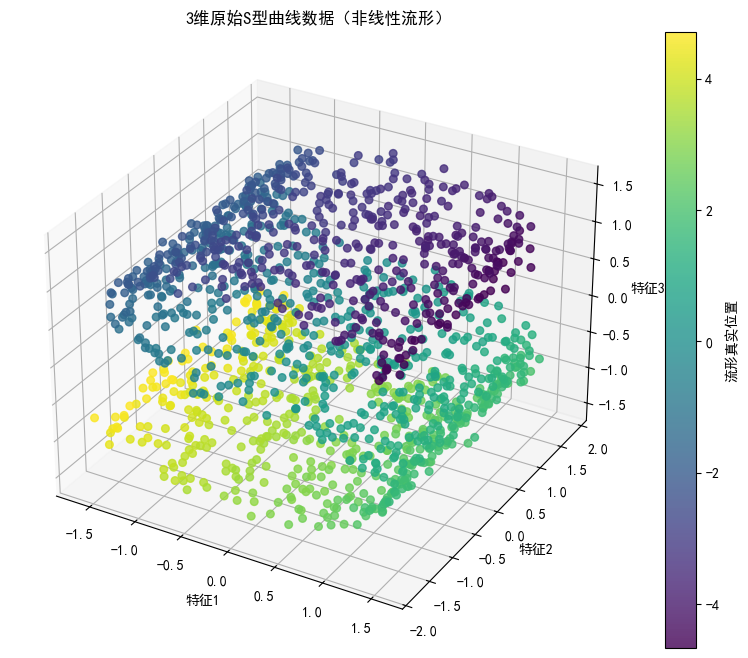

In [3]:
# 绘制3维原始S型曲线
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                     c=y, cmap='viridis', s=30, alpha=0.8)
ax.set_xlabel('特征1')
ax.set_ylabel('特征2')
ax.set_zlabel('特征3')
ax.set_title('3维原始S型曲线数据（非线性流形）')
plt.colorbar(scatter, label='流形真实位置')
plt.show()

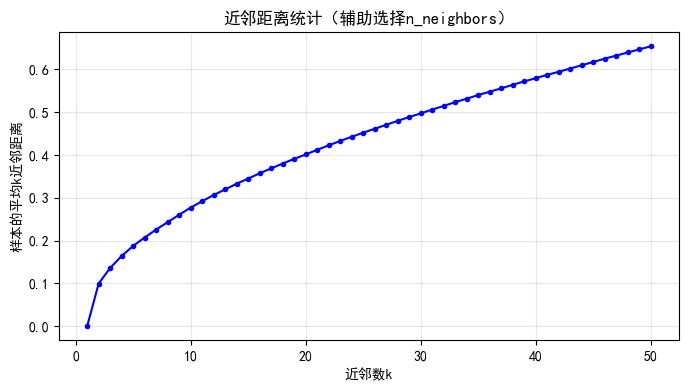

In [4]:

nn = NearestNeighbors(n_neighbors=50).fit(X_scaled)
distances, _ = nn.kneighbors(X_scaled)
# 绘制前20个近邻的平均距离曲线
plt.figure(figsize=(8, 4))
plt.plot(range(1, 51), distances.mean(axis=0), 'b-', marker='.')
plt.xlabel('近邻数k')
plt.ylabel('样本的平均k近邻距离')
plt.title('近邻距离统计（辅助选择n_neighbors）')
plt.grid(True, alpha=0.3)
plt.show()

# 本次实战选择最优近邻数：15（距离曲线趋于平稳的拐点）
optimal_nn = 15

LLE降维后数据维度：(1500, 2)
PCA降维后数据维度：(1500, 2)


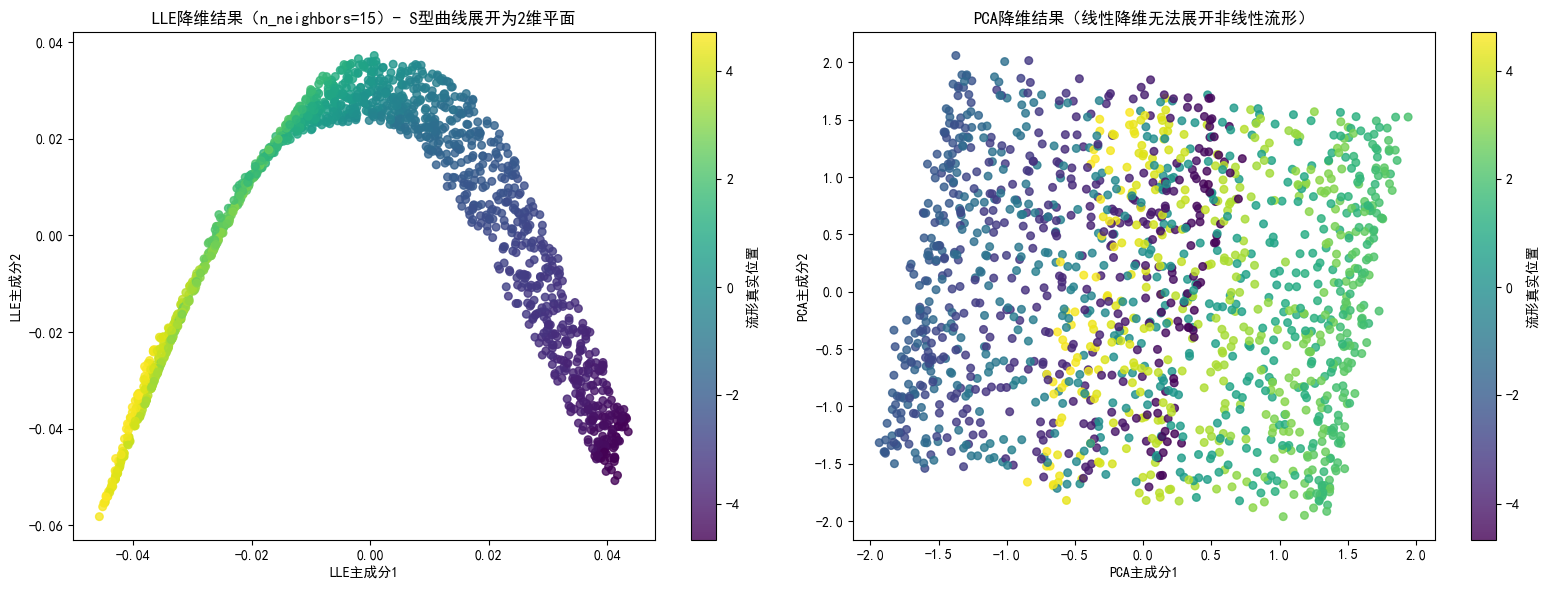

In [ ]:
# LLE降维（映射到2维）
lle = LocallyLinearEmbedding(
    n_neighbors=optimal_nn,  # 最优近邻数
    n_components=2,          # 降维到2维（可视化）
    eigen_solver='auto',     # 自动选择特征值求解器
    random_state=42,
    n_jobs=-1                # 利用所有CPU核心，加速计算
)
X_lle = lle.fit_transform(X_scaled)  # 拟合+降维
print(f"LLE降维后数据维度：{X_lle.shape}")  # (1500, 2)

# PCA降维（作为对比，线性降维）
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA降维后数据维度：{X_pca.shape}")  # (1500, 2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LLE降维结果
sc1 = ax1.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='viridis', s=30, alpha=0.8)
ax1.set_xlabel('LLE主成分1')
ax1.set_ylabel('LLE主成分2')
ax1.set_title(f'LLE降维结果（n_neighbors={optimal_nn}）- S型曲线展开为2维平面')
plt.colorbar(sc1, ax=ax1, label='流形真实位置')

# PCA降维结果
sc2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=30, alpha=0.8)
ax2.set_xlabel('PCA主成分1')
ax2.set_ylabel('PCA主成分2')
ax2.set_title('PCA降维结果（线性降维无法展开非线性流形）')
plt.colorbar(sc2, ax=ax2, label='流形真实位置')

plt.tight_layout()
plt.show()

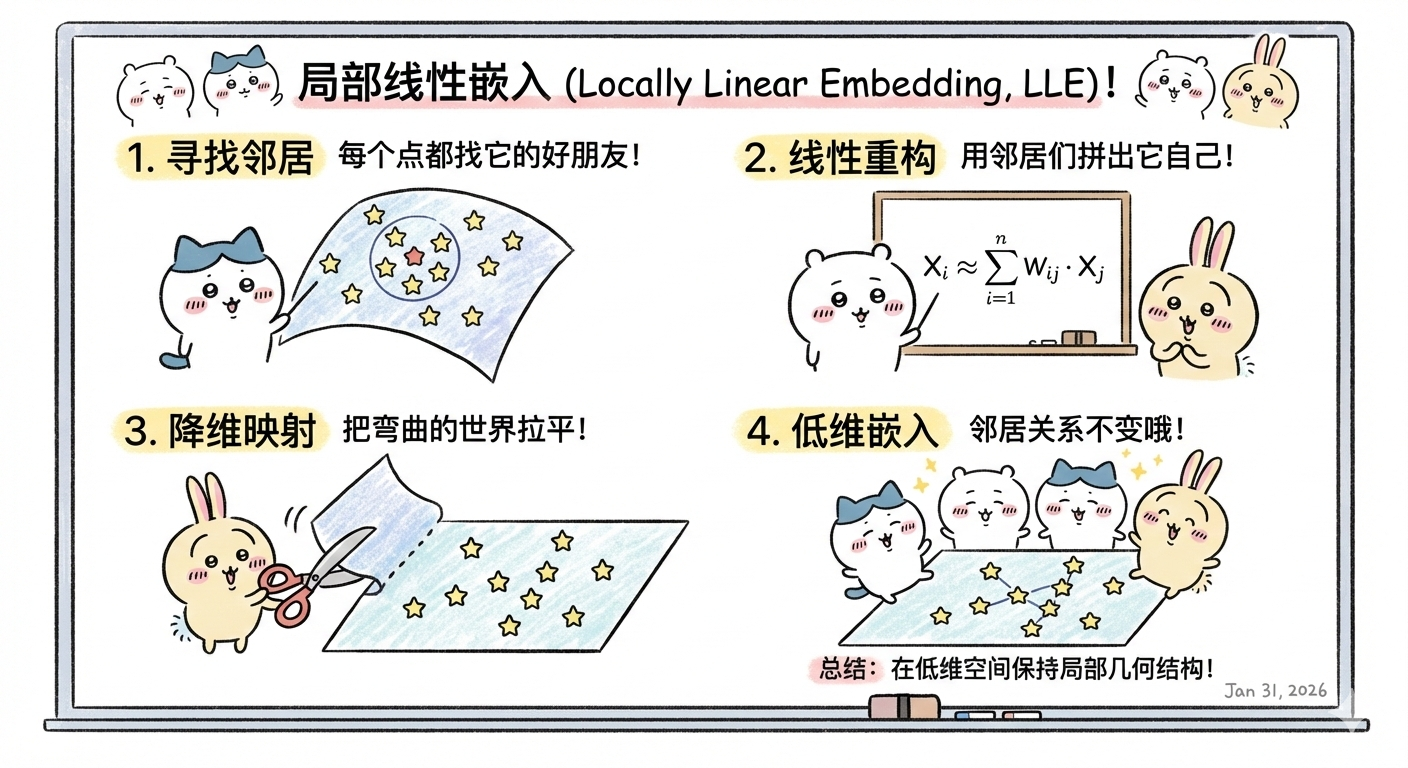